# Trabalho Final

## Imports

In [1]:
import itertools
import pandas as pd
import numpy as np
import IPython
import random

pd.set_option('display.max_colwidth', None)

## Functions

In [2]:
# Respetivo tempo de cada Tarefa
Inicio = {'T1':38, 'T2':33, 'T3':36, 'T4':20, 'T5':32, 'T6':29, 'T7':46, 'T8':38, 'T9':34, 'T10':40}

# Coluna (Respetiva máquina e qual ordem da tarefa)
colunas = ["M1_T1", "M1_T2", "M1_T3", "M1_T4", "M2_T1", "M2_T2", "M2_T3", "M3_T1", "M3_T2", "M3_T3"]

In [3]:
def DemoraMaquina(df_permutations):
    df_permutations["Maq1"] = df_permutations[["M1_T1", "M1_T2", "M1_T3", "M1_T4"]].apply(lambda row: sum(Inicio.get(valor) for valor in row), axis=1)
    df_permutations["Maq2"] = df_permutations[["M2_T1", "M2_T2", "M2_T3"]].apply(lambda row: sum(Inicio.get(valor) for valor in row), axis=1)
    df_permutations["Maq3"] = df_permutations[["M3_T1", "M3_T2", "M3_T3"]].apply(lambda row: sum(Inicio.get(valor) for valor in row), axis=1)
    df_permutations["MaquinaDemora"] = df_permutations[["Maq1", "Maq2", "Maq3"]].max(axis=1)
    df_permutations.drop(["Maq1", "Maq2", "Maq3"], axis=1, inplace=True)

In [4]:
def RespeitaRestricao(df_permutations):    
    df_permutations["Soma_M1"] = 0
    df_permutations["Soma_M2"] = 0
    df_permutations["Soma_M3"] = 0

    for index, row in df_permutations.iterrows():
        soma_m1 = 0
        m1_critico = 0
        m1_iterado = 0
        soma_m2 = 0
        m2_critico = 0
        m2_iterado = 0
        soma_m3 = 0
        m3_critico = 0
        m3_iterado = 0

        for i in range(1, 5):
            tarefa_m1 = row[f"M1_T{i}"]
            if tarefa_m1 in ["T3", "T4", "T5"]:
                m1_critico += 1
                soma_m1 += m1_iterado
                soma_m1 += Inicio.get(tarefa_m1)
                m1_iterado = 0
            else:
                m1_iterado += Inicio.get(tarefa_m1, 0)
        if m1_critico == 0:
            soma_m1 = 0

        for i in range(1, 4):
            tarefa_m2 = row[f"M2_T{i}"]
            if tarefa_m2 in ["T3", "T4", "T5"]:
                m2_critico += 1
                soma_m2 *= m2_iterado
                soma_m2 += Inicio.get(tarefa_m2)
                m2_iterado = 0
            else:
                m2_iterado += Inicio.get(tarefa_m1, 0)
        if m2_critico == 0:
            soma_m2 = 0

        for i in range(1, 4):
            tarefa_m3 = row[f"M3_T{i}"]
            if tarefa_m3 in ["T3", "T4", "T5"]:
                m3_critico += 1
                soma_m3 += m3_iterado
                soma_m3 += Inicio.get(tarefa_m3)
                m3_iterado = 0
            else:
                m3_iterado += Inicio.get(tarefa_m1, 0)
        if m3_critico == 0:
            soma_m3 = 0

        df_permutations.at[index, "Soma_M1"] = soma_m1
        df_permutations.at[index, "Soma_M2"] = soma_m2
        df_permutations.at[index, "Soma_M3"] = soma_m3
    df_permutations["Maior_Soma"] = df_permutations[["Soma_M1", "Soma_M2", "Soma_M3"]].max(axis=1)
    df_permutations["Restrição Respeitada?"] = df_permutations["Maior_Soma"] <= 96

    df_permutations.drop(["Soma_M1", "Soma_M2", "Soma_M3", "Maior_Soma"], axis=1, inplace=True)

In [5]:
def verificar_cromossomo(cromossomo):
    tarefas_unicas = set(cromossomo)  # Remove duplicatas das tarefas
    if len(tarefas_unicas) == len(cromossomo):  # Verifica se todas as tarefas são únicas
        return True
    else:
        return False

In [6]:
def verificar_cromossomo2(df):
    df['Cromossoma Admissivel?'] = df.apply(lambda row: len(set(row[:10])) == 10, axis=1)
    return df

## Pergunta a)

**Neste pergunta será referida uma heurística possível para se aplicar neste problema**

1. Iremos atribuir as 3 tarefas críticas (T3, T4, T5), a cada uma das máquinas, a fim de se conseguir realizar o prazo o mais rápido possivel
2. De seguida, será colocado a tarefa mais rápida na máquina com mais tarefas
3. Por fim, serão atribuidos aleatoriamente as restantes tarefas

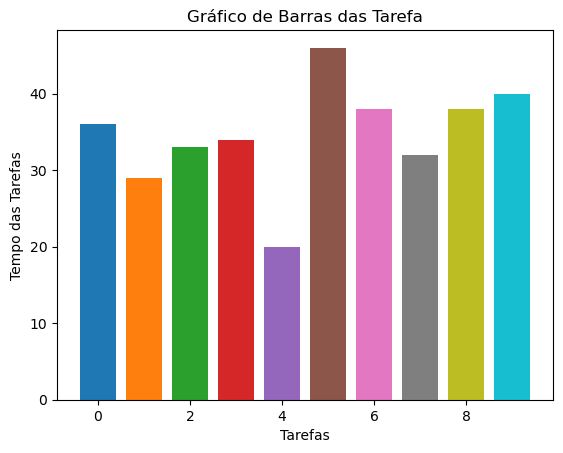

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Inicio = {'T1': 38, 'T2': 33, 'T3': 36, 'T4': 20, 'T5': 32, 'T6': 29, 'T7': 46, 'T8': 38, 'T9': 34, 'T10': 40}
Heuristica = ["T3", "T6", "T2", "T9", "T4", "T7", "T1", "T5", "T8", "T10"]

# Definir uma paleta de cores personalizada
cores = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Calcular a soma dos valores de Inicio para cada máquina
somas_m1 = []
somas_m2 = []
somas_m3 = []
separadores = []

for tarefa in Heuristica:
    valor = Inicio.get(tarefa, 0)
    if tarefa in ["T3", "T4", "T5"]:
        somas_m1.append(valor)
        somas_m2.append(0)
        somas_m3.append(0)
    elif tarefa in ["T1", "T2", "T6"]:
        somas_m1.append(0)
        somas_m2.append(valor)
        somas_m3.append(0)
    else:
        somas_m1.append(0)
        somas_m2.append(0)
        somas_m3.append(valor)
    separadores.append(0)  # Adicionar o valor 0 para separar as tarefas

# Configurar as cores para cada tarefa
cores_tarefas = [cores[i % len(cores)] for i in range(len(Heuristica))]

# Criar a figura e os eixos do gráfico
fig, ax = plt.subplots()

# Plotar as barras do gráfico
ax.bar(np.arange(len(Heuristica)), somas_m1, color=cores_tarefas)
ax.bar(np.arange(len(Heuristica)), somas_m2, bottom=somas_m1, color=cores_tarefas)
ax.bar(np.arange(len(Heuristica)), somas_m3, bottom=np.add(somas_m1, somas_m2), color=cores_tarefas)

# Adicionar a linha separadora entre as tarefas
ax.plot(np.arange(len(Heuristica)), separadores, color='black', linewidth=0.5)

# Configurar o xlabel e ylabel
ax.set_xlabel("Tarefas")
ax.set_ylabel("Tempo das Tarefas")

# Configurar o título do gráfico
ax.set_title("Gráfico de Barras das Tarefa")

# Mostrar o gráfico
plt.show()

## Pergunta b)

In [8]:
Heuristica = ["T3", "T6", "T2", "T9", "T4", "T7", "T1", "T5", "T8", "T10"]

In [9]:
df_heuristica = pd.DataFrame([Heuristica], columns=colunas)
df_heuristica

,M1_T1,M1_T2,M1_T3,M1_T4,M2_T1,M2_T2,M2_T3,M3_T1,M3_T2,M3_T3
0,T3,T6,T2,T9,T4,T7,T1,T5,T8,T10


In [10]:
df_permutations = df_heuristica.copy()
DemoraMaquina(df_permutations)
RespeitaRestricao(df_permutations)
df_permutations

,M1_T1,M1_T2,M1_T3,M1_T4,M2_T1,M2_T2,M2_T3,M3_T1,M3_T2,M3_T3,MaquinaDemora,Restrição Respeitada?
0,T3,T6,T2,T9,T4,T7,T1,T5,T8,T10,132,True


In [11]:
print("=================================================================")
for coluna in df_permutations.columns[:4]:
    primeira_linha = df_permutations[coluna].iloc[0]
    print(f" ⚫ A \033[1mmáquina 1\033[0m possui a \033[1mtarefa{primeira_linha}\033[0m, que possui uma \033[1mduração de {Inicio.get(primeira_linha)}\033[0m")
for coluna in df_permutations.columns[4:7]:
    primeira_linha = df_permutations[coluna].iloc[0]
    print(f" ⚫ A \033[1mmáquina 2\033[0m possui a \033[1mtarefa{primeira_linha}\033[0m, que possui uma \033[1mduração de {Inicio.get(primeira_linha)}\033[0m")
for coluna in df_permutations.columns[7:]:
    primeira_linha = df_permutations[coluna].iloc[0]
    print(f" ⚫ A \033[1mmáquina 3\033[0m possui a \033[1mtarefa{primeira_linha}\033[0m, que possui uma \033[1mduração de {Inicio.get(primeira_linha)}\033[0m")
print("=================================================================")

 ⚫ A máquina 1 possui a tarefaT3, que possui uma duração de 36
 ⚫ A máquina 1 possui a tarefaT6, que possui uma duração de 29
 ⚫ A máquina 1 possui a tarefaT2, que possui uma duração de 33
 ⚫ A máquina 1 possui a tarefaT9, que possui uma duração de 34
 ⚫ A máquina 2 possui a tarefaT4, que possui uma duração de 20
 ⚫ A máquina 2 possui a tarefaT7, que possui uma duração de 46
 ⚫ A máquina 2 possui a tarefaT1, que possui uma duração de 38
 ⚫ A máquina 3 possui a tarefaT5, que possui uma duração de 32
 ⚫ A máquina 3 possui a tarefaT8, que possui uma duração de 38
 ⚫ A máquina 3 possui a tarefaT10, que possui uma duração de 40
 ⚫ A máquina 3 possui a tarefa132, que possui uma duração de None
 ⚫ A máquina 3 possui a tarefaTrue, que possui uma duração de None


É possível visualizar que a restrição foi respeitada

## Pergunta c)

In [12]:
Cromossoma = '[' + ', '.join([f"'{valor}'" for valor in Heuristica]) + ']'
print(Cromossoma)

['T3', 'T6', 'T2', 'T9', 'T4', 'T7', 'T1', 'T5', 'T8', 'T10']


Nota:
- As 4 primeiras tarefas correspondem à máquina 1
- Da 5 à 7 tarefas correspondem à máquina 2
- As restantes tarefas correspondem à máquina 3

## Pergunta d)

**Operador de cromossoma**

### Crossover Uniforme

In [33]:
import random
import copy

heuristica = ["T3", "T6", "T2", "T9", "T4", "T7", "T1", "T5", "T8", "T10"]

def CrossUniforme(heuristica):
    pai1 = copy.deepcopy(heuristica)
    pai2 = copy.deepcopy(heuristica)
    random.shuffle(pai2)

    filho1 = []
    filho2 = []

    for i in range(len(heuristica)):
        if random.random() < 0.5:  # Seleciona aleatoriamente entre os pais
            filho1.append(pai1[i])
            filho2.append(pai2[i])
        else:
            filho1.append(pai2[i])
            filho2.append(pai1[i])
    return filho1, filho2

filho1, filho2 = CrossUniforme(heuristica)

In [34]:
df_filhos = pd.DataFrame()

for i, coluna in enumerate(df_heuristica.columns):
    df_filhos[coluna] = [filho1[i], filho2[i]]
DemoraMaquina(df_filhos)
RespeitaRestricao(df_filhos)
verificar_cromossomo2(df_filhos)
df_filhos

,M1_T1,M1_T2,M1_T3,M1_T4,M2_T1,M2_T2,M2_T3,M3_T1,M3_T2,M3_T3,MaquinaDemora,Restrição Respeitada?,Cromossoma Admissivel?
0,T3,T8,T7,T9,T4,T4,T1,T2,T8,T10,154,True,False
1,T5,T6,T2,T6,T1,T7,T10,T5,T9,T3,124,False,False


In [15]:
df_filhos['Cromossoma Admissivel?'] = df_filhos.apply(lambda row: len(set(row[:10])) == 10, axis=1)
df_filhos

,M1_T1,M1_T2,M1_T3,M1_T4,M2_T1,M2_T2,M2_T3,M3_T1,M3_T2,M3_T3,MaquinaDemora,Restrição Respeitada?,Cromossoma Admissivel?
0,T3,T5,T9,T9,T10,T7,T1,T6,T1,T10,136,True,False
1,T2,T6,T2,T8,T4,T7,T4,T5,T8,T3,133,False,False


In [16]:
df_heuristica.columns

Index(['M1_T1', 'M1_T2', 'M1_T3', 'M1_T4', 'M2_T1', 'M2_T2', 'M2_T3', 'M3_T1',
       'M3_T2', 'M3_T3'],
      dtype='object')

### Crossover a 1 Ponto

In [17]:
Heuristica = ["T3", "T6", "T2", "T9", "T4", "T7", "T1", "T5", "T8", "T10"]

In [18]:
def crossover_um_ponto(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 1)
    filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
    filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
    print(f"K={ponto_corte}")
    return filho1, filho2

pai1 = copy.deepcopy(heuristica)
pai2 = copy.deepcopy(heuristica)
random.shuffle(pai2)

filho1, filho2 = crossover_um_ponto(pai1, pai2)
print("Filho 1:", filho1)
print("Filho 2:", filho2)

K=4
Filho 1: ['T3', 'T6', 'T2', 'T9', 'T1', 'T6', 'T5', 'T8', 'T7', 'T4']
Filho 2: ['T9', 'T3', 'T2', 'T10', 'T4', 'T7', 'T1', 'T5', 'T8', 'T10']


In [19]:
df_filhos = pd.DataFrame()

for i, coluna in enumerate(df_heuristica.columns):
    df_filhos[coluna] = [filho1[i], filho2[i]]
DemoraMaquina(df_filhos)
RespeitaRestricao(df_filhos)
verificar_cromossomo2(df_filhos)
df_filhos

,M1_T1,M1_T2,M1_T3,M1_T4,M2_T1,M2_T2,M2_T3,M3_T1,M3_T2,M3_T3,MaquinaDemora,Restrição Respeitada?,Cromossoma Admissivel?
0,T3,T6,T2,T9,T1,T6,T5,T8,T7,T4,132,True,False
1,T9,T3,T2,T10,T4,T7,T1,T5,T8,T10,143,True,False


## Pergunta e)

**Operador de Mutação**

### Mutação por troca

In [52]:
def mutacao_troca(cromossomo, probabilidade=.1):
    cromossomo_mutado = copy.deepcopy(cromossomo)
    
    # Verificar se a mutação será aplicada com base na probabilidade
    if random.random() < probabilidade:
        # Selecionar aleatoriamente duas posições diferentes no cromossomo
        posicao1 = random.randint(0, len(cromossomo)-1)
        posicao2 = random.randint(0, len(cromossomo)-1)
        
        # Realizar a troca entre as duas posições
        cromossomo_mutado[posicao1], cromossomo_mutado[posicao2] = cromossomo_mutado[posicao2], cromossomo_mutado[posicao1]
    
    return cromossomo_mutado

In [53]:
filho1, filho2 = CrossUniforme(heuristica)

In [54]:
print(filho1, "\n",filho2)

['T3', 'T3', 'T4', 'T2', 'T4', 'T10', 'T1', 'T8', 'T8', 'T5'] 
 ['T7', 'T6', 'T2', 'T9', 'T1', 'T7', 'T9', 'T5', 'T6', 'T10']


In [55]:
filho1 = mutacao_troca(filho1)
filho2 = mutacao_troca(filho2)

In [57]:
print(filho1, "\n", filho2)

['T3', 'T3', 'T4', 'T2', 'T4', 'T10', 'T1', 'T8', 'T8', 'T5'] 
 ['T7', 'T6', 'T2', 'T9', 'T1', 'T7', 'T9', 'T5', 'T6', 'T10']


## Pergunta f)

**Tipos de inadmissibilidades que não permitem obter soluções admissiveis**

### Cromossomas inadmissiveis

    No contexto deste problema, um cromossoma inadmissivel é um cromossoma que não possui todas as tarefas.
    Em baixo iremos aplicar o crossover de um ponto que, maior parte das vezes, devolve uma solução inadmissivel, podendo então usar como exemplo

In [80]:
filho1, filho2 = crossover_um_ponto(pai1, pai2)
filho1, filho2

K=5


(['T3', 'T6', 'T2', 'T9', 'T4', 'T6', 'T5', 'T8', 'T7', 'T4'],
 ['T9', 'T3', 'T2', 'T10', 'T1', 'T7', 'T1', 'T5', 'T8', 'T10'])

Analisando com atenção, podemos verificar que estes cromossomas filho não admissíveis, sendo necessário tratá-los. \
Em baixo, podemos visualizar um exemplo de como corrigir estes cromossomas

    i. Identificar a tarefa que não está a ser realizada;
    ii. Identificar a tarefa que está a ser realizada por dois trabalhadores;
    iii. No primeiro gene com o valor da tarefa que é realizada por dois trabalhadores, altera-se o valor para a tarefa que não estava a ser realizada.

In [81]:
def corrigirCromossoma(lista_tarefas):
    All = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10']
    repetido = []
    falta = []
    new_list = []
    for i in All:
        if i not in lista_tarefas:
            falta.append(i)
    if len(falta) == 0:
        return lista_tarefas
    for i in lista_tarefas:
        if i not in repetido:
            new_list.append(i)
            repetido.append(i)
        else:
            new_list.append(falta[0])
            falta.pop(0)
    return new_list

In [82]:
corrigirCromossoma(filho1)

['T3', 'T6', 'T2', 'T9', 'T4', 'T1', 'T5', 'T8', 'T7', 'T10']

**Nota: \
Também podemos referir várias Mutações/Restrições que não respeitam as restrições das 96 horas, sendo possível visualizar vários exemplos disso ao longo do código. \
Uma forma de resolver seria rejeitar estes filhos.**

## Pergunta g)

- - -